In [1]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import numpy as np
import os
import sys
from six.moves import cPickle
import tensorflow as tf
import matplotlib.pyplot as plt

# hyper parameter
batch_size = 32
num_classes = 100
epochs = 30

# 데이터 총 개수 : 40000개
# 클래스 개수 : 100개, 클래스 별 400개 이미지

steps_per_epoch = int(40000/batch_size)
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model.h5'

In [0]:
from google.colab import files
data = files.upload()

Saving train_data to train_data


In [4]:
import sklearn.model_selection as sk

def load_data():
    path = './data'

    fpath = os.path.join(path, 'train_data')
    
    with open(fpath, 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
        
    X_train = d['data']
    y_train = d['labels']
    y_train = np.reshape(y_train, (len(y_train), 1))

    return X_train, y_train

x_train, y_train = load_data()

# x_train : total img dataset
# y_train : total label datset


# test, train dataset 분류하기 
X_train, X_test, y_train, y_test = sk.train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)


(26800, 32, 32, 3) uint8
(26800, 1) int64
(13200, 32, 32, 3) uint8
(13200, 1) int64


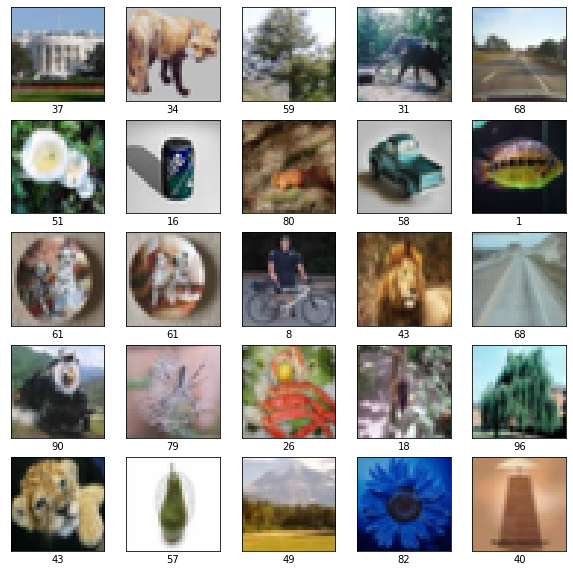

In [5]:
# understand data
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

# check data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

In [6]:
# Basic image preprocessing

X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

# label preprocessing: one hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

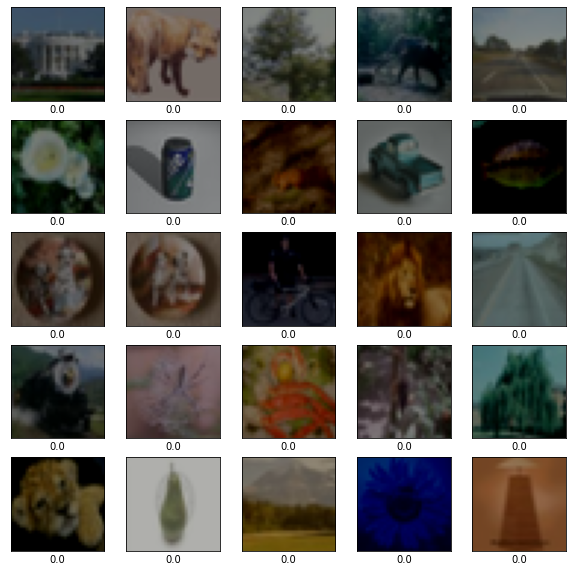

In [0]:
# image data preprocessing1: brightness

X_train = tf.image.random_brightness(
    X_train, 0.5, seed=None
)

X_test = tf.image.random_brightness(
    X_test, 0.5, seed=None
)


# image data preprocessing2: contrast
X_train = tf.image.random_contrast(
    X_train, 0.2, 1.8, seed=None
)

X_test = tf.image.random_contrast(
    X_test, 0.2, 1.8, seed=None
)


plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_test[i][0])
plt.show()

In [7]:

# model2 : 기존 말고 새로운 모델 만들어보기~!

# weight initializer : he_normal
# activation : relu

# add BatchNormalization
# add maxpooling
# add Dropout

from keras.optimizers import adam

model2 = Sequential()

model2.add(Conv2D(50, (3, 3),
                 padding='same',
                 input_shape=X_train.shape[1:],
                 kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

model2.add(Conv2D(filters = 50, 
                  kernel_size = (3,3), 
                  strides = (1,1), 
                  padding = 'same', 
                  kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))


model2.add(Flatten())

model2.add(Dense(100, activation = 'relu', kernel_initializer='he_normal'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation = 'softmax', kernel_initializer='he_normal'))

adam = optimizers.Adam(lr = 0.001)

model2.compile(loss = 'categorical_crossentropy', 
               optimizer = adam, 
               metrics = ['accuracy'])

model2.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 50)        22550     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 50)        200       
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 50)        0

Using TensorFlow backend.


In [8]:
# Train

history = model2.fit(X_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            shuffle=True,
            validation_data=(X_test, y_test),
            workers=4)

# # Save model and weights
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

ValueError: Number of samples 26800 is less than samples required for specified batch_size 32 and steps 1250